In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [53]:
x_data = [1,2,3]
y_data = [1,2,3]
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

In [54]:
W = tf.placeholder(tf.float32)

In [55]:
hypothesis = X * W

In [56]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [57]:
sess = tf.Session()

In [58]:
sess.run(tf.global_variables_initializer())

In [59]:
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i*0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={X:x_data, Y:y_data, W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

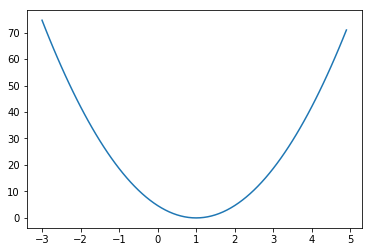

In [60]:
plt.plot(W_val, cost_val)
plt.show()

In [64]:

W = tf.Variable(tf.random_normal([1]), name="weight") # Variable!

hypothesis = X*W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

sess.run(tf.global_variables_initializer()) # W를 다시 정의해주었으므로 다시 초기화가 필요하다.

learning_rate = 0.1
gradient = learning_rate * tf.reduce_mean((W*X - Y) * X) 
descent = W - learning_rate * gradient
update = W.assign(descent) #직접 W = .. 으로 할당할 수 없다(텐서플로우)


for step in range(21):
    sess.run(update, feed_dict={X:x_data, Y:y_data})
    print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}))



0 0.08615597
1 0.07830239
2 0.071164735
3 0.064677685
4 0.05878198
5 0.053423632
6 0.048553813
7 0.04412785
8 0.040105388
9 0.036449563
10 0.03312701
11 0.030107295
12 0.027362809
13 0.024868539
14 0.022601657
15 0.020541402
16 0.018668951
17 0.016967181
18 0.015420534
19 0.0140148625
20 0.012737341


In [94]:
import tensorflow as tf
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
x_data = [1,2,3]
y_data = [1,2,3]

W = tf.Variable(5.0)

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(100):
    print(i, sess.run(W))
    sess.run(train, {X:x_data, Y:y_data})

sess.run([cost, W], {X:x_data, Y:y_data})

0 5.0
1 4.6266665
2 4.2881775
3 3.9812808
4 3.703028
5 3.4507453
6 3.2220092
7 3.0146217
8 2.8265903
9 2.6561086
10 2.5015385
11 2.361395
12 2.2343314
13 2.119127
14 2.0146751
15 1.9199722
16 1.8341081
17 1.756258
18 1.685674
19 1.6216778
20 1.5636545
21 1.5110468
22 1.4633491
23 1.4201032
24 1.3808936
25 1.3453435
26 1.3131114
27 1.2838877
28 1.2573916
29 1.2333684
30 1.2115873
31 1.1918392
32 1.1739342
33 1.1577003
34 1.1429816
35 1.1296366
36 1.1175373
37 1.1065671
38 1.0966209
39 1.087603
40 1.0794266
41 1.0720135
42 1.0652922
43 1.0591983
44 1.0536731
45 1.0486636
46 1.0441216
47 1.0400037
48 1.03627
49 1.0328848
50 1.0298156
51 1.0270327
52 1.0245097
53 1.022222
54 1.020148
55 1.0182675
56 1.0165626
57 1.0150168
58 1.0136153
59 1.0123445
60 1.0111923
61 1.0101477
62 1.0092006
63 1.0083419
64 1.0075634
65 1.0068574
66 1.0062174
67 1.005637
68 1.005111
69 1.0046339
70 1.0042014
71 1.0038093
72 1.0034539
73 1.0031315
74 1.0028392
75 1.0025742
76 1.002334
77 1.0021162
78 1.0019187
79

[2.3041927e-07, 1.0002222]

In [104]:
import tensorflow as tf

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
x_data = [1,2,3]
y_data = [1,2,3]

W = tf.Variable(5.0)

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# User defined gradient
gradient = tf.reduce_mean(( W * X - Y) * X) * 2

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# train = optimizer.minimize(cost)

gvs = optimizer.compute_gradients(cost, [W]) # IMPORTANT
apply_gradients = optimizer.apply_gradients(gvs) # new train

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(100):
    print(sess.run([gradient, gvs], {X:x_data, Y:y_data}))
    sess.run(apply_gradients, {X:x_data, Y:y_data})


[37.333332, [(37.333336, 5.0)]]
[33.84889, [(33.84889, 4.6266665)]]
[30.689657, [(30.689657, 4.2881775)]]
[27.825287, [(27.825287, 3.9812808)]]
[25.228262, [(25.228264, 3.703028)]]
[22.873621, [(22.873623, 3.4507453)]]
[20.738752, [(20.738752, 3.2220092)]]
[18.803137, [(18.803137, 3.0146217)]]
[17.048176, [(17.048176, 2.8265903)]]
[15.457013, [(15.457014, 2.6561086)]]
[14.014359, [(14.01436, 2.5015385)]]
[12.706352, [(12.706352, 2.361395)]]
[11.520427, [(11.520427, 2.2343314)]]
[10.445186, [(10.445186, 2.119127)]]
[9.470302, [(9.470302, 2.0146751)]]
[8.586407, [(8.586407, 1.9199722)]]
[7.785009, [(7.785009, 1.8341081)]]
[7.0584083, [(7.0584083, 1.756258)]]
[6.399624, [(6.399624, 1.685674)]]
[5.8023257, [(5.8023257, 1.6216778)]]
[5.260776, [(5.260776, 1.5636545)]]
[4.7697697, [(4.7697697, 1.5110468)]]
[4.324591, [(4.324591, 1.4633491)]]
[3.9209633, [(3.9209635, 1.4201032)]]
[3.5550067, [(3.5550067, 1.3808936)]]
[3.2232056, [(3.2232056, 1.3453435)]]
[2.9223735, [(2.9223738, 1.3131114)]]


In [105]:
# Multi variable linear regression #

In [115]:
import tensorflow as tf
import numpy as np

x_data = [[73., 93., 89., 96., 73.], [80., 88., 91., 98., 66.], [75., 93., 90., 100., 70.]]
y_data = [[152., 185., 180., 196., 142.]]


X = tf.placeholder(tf.float32, shape=[3, None])
Y = tf.placeholder(tf.float32, shape=[1, None])

W = tf.Variable(tf.random_normal([1, 3]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

hypothesis = tf.matmul(W, X) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], {X:x_data, Y:y_data})
    
    if step % 10 == 0:
        print(step, "cost: ", cost_val, " prediction: ", hy_val)

0 cost:  13697.4375  prediction:  [[43.298283 62.82345  56.3598   61.69776  50.239296]]
10 cost:  8.671149  prediction:  [[146.80911 187.21446 178.93549 195.17819 145.11417]]
20 cost:  8.501007  prediction:  [[147.13353 187.58315 179.3098  195.58443 145.39128]]
30 cost:  8.456419  prediction:  [[147.1457  187.57661 179.31438 195.58803 145.38219]]
40 cost:  8.412075  prediction:  [[147.15689 187.56895 179.31783 195.59038 145.37224]]
50 cost:  8.367948  prediction:  [[147.16806 187.56133 179.32127 195.59276 145.36232]]
60 cost:  8.324087  prediction:  [[147.17918 187.5537  179.32469 195.59508 145.35243]]
70 cost:  8.280441  prediction:  [[147.19029 187.5461  179.32811 195.59743 145.34258]]
80 cost:  8.237032  prediction:  [[147.20137 187.53851 179.33153 195.59976 145.33275]]
90 cost:  8.193852  prediction:  [[147.21242 187.53096 179.33493 195.6021  145.32294]]
100 cost:  8.150933  prediction:  [[147.22342 187.52342 179.33833 195.60443 145.31316]]
110 cost:  8.108244  prediction:  [[147.2

1150 cost:  4.7217903  prediction:  [[148.22928 186.83527 179.64825 195.81496 144.42166]]
1160 cost:  4.697625  prediction:  [[148.23755 186.8296  179.65082 195.81668 144.41435]]
1170 cost:  4.673564  prediction:  [[148.2458  186.82396 179.65335 195.81839 144.40704]]
1180 cost:  4.649629  prediction:  [[148.25403 186.81831 179.65588 195.8201  144.39975]]
1190 cost:  4.6258264  prediction:  [[148.26225 186.8127  179.65842 195.8218  144.3925 ]]
1200 cost:  4.602182  prediction:  [[148.27043 186.8071  179.66093 195.8235  144.38527]]
1210 cost:  4.5786467  prediction:  [[148.2786  186.80153 179.66347 195.8252  144.37804]]
1220 cost:  4.555196  prediction:  [[148.28676 186.79594 179.66597 195.82689 144.37083]]
1230 cost:  4.531939  prediction:  [[148.29488 186.7904  179.66847 195.82857 144.36366]]
1240 cost:  4.508779  prediction:  [[148.30296 186.78485 179.67097 195.83025 144.35649]]
1250 cost:  4.485744  prediction:  [[148.31105 186.77934 179.67348 195.83192 144.34935]]
1260 cost:  4.4628